In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ds = pd.read_excel('data_set.xlsx')

In [100]:
#NaN FIX
ds['NEAR_metro_rjd'].fillna(0, inplace=True)
ds['NEAR_Stations'].fillna(0, inplace=True)
m = {'остановка' : 1, 0 : 0}
ds['NEAR_Stations'] = ds['NEAR_Stations'].map(m)
ds['cashbox_trend'].fillna(ds['cashbox_trend'].mean(), inplace=True)
ds['Postamat_trend'].fillna(ds['Postamat_trend'].mean(), inplace=True)
ds.isnull().count()

ADDRESS                    417
CITY                       417
REGION                     417
Postamat_daily             417
cashbox_daily              417
Postamat_trend             417
cashbox_MAX                417
cashbox_trend              417
hh_500                     417
value1                     417
value2                     417
POPULATION                 417
NEAR_Malls                 417
NEAR_Business_centers      417
NEAR_metro_rjd             417
NEAR_Stations              417
macro_salary_avg_yearly    417
dtype: int64

In [101]:
df = ds[ds['REGION'] == 'Тульская область']

In [102]:
def getX(x_name):
    x = np.array(df[x_name]).reshape((-1, 1))
def getY(y_name):
    y = np.array(df[y_name])
    
def getPrecision(x, y):
    model = LinearRegression()
    print(x)
    print(y)
    model.fit(x, y)
    model = LinearRegression().fit(x, y)
    return [model.intercept_, model.coef_[0]]
    

In [103]:

#for cashbox_Daily::

def printPlots(column_name, feature_names):
    target_names = [column_name]
    #feature_names = ['cashbox_MAX', 'cashbox_trend', 'hh_500', 'value1', 'value2', 'NEAR_Malls', 'NEAR_Business_centers', 'NEAR_metro_rjd', 'NEAR_Stations']
    
    data_Tul_Obl = df[(df[column_name].notnull())]
    
    plt.figure(figsize=(20, 70))
    plot_number = 0
    for target_name in target_names:
        for feature_name in feature_names:
            plot_number += 1
            plt.subplot(10, 2, plot_number)
            plt.scatter(data_Tul_Obl[feature_name], data_Tul_Obl[target_name])
            coff = getPrecision(getX(feature_name), getY(target_name))
            x = np.linspace(data_Tul_Obl[feature_name].min(), data_Tul_Obl[feature_name].max())
            plt.plot(x, x*coff[0] + coff[1])
            plt.xlabel(feature_name)
            plt.ylabel(target_name)

None
None


ValueError: y cannot be None

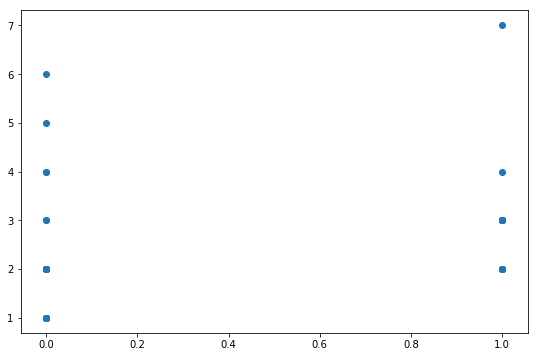

In [104]:
printPlots('Postamat_daily', ['Postamat_trend', 'hh_500', 'value1', 'value2', 'NEAR_Malls', 'NEAR_Business_centers', 'NEAR_metro_rjd', 'NEAR_Stations'])

In [54]:
#printPlots('cashbox_daily', ['cashbox_MAX', 'cashbox_trend', 'hh_500', 'value1', 'value2', 'NEAR_Malls', 'NEAR_Business_centers', 'NEAR_metro_rjd', 'NEAR_Stations'])

In [56]:
getPrecision('cashbox_daily', 'cashbox_trend')

[0.8297832231679785, 0.05683044647597266]